# Datascience Group Project

In [4]:
# The source from which all knowledge comes:

# Labour force characteristics, annual
# https://open.canada.ca/data/en/dataset/621006f5-bc1b-4893-be77-ac5a6de35f0a
gov_site = 'https://www150.statcan.gc.ca/n1/tbl/csv/14100391-eng.zip'


# Labour force characteristics by sex and detailed age group, monthly, unadjusted for seasonality
# https://open.canada.ca/data/en/dataset/17b836c1-e7ec-48b9-b7a3-f370f1006975
gov_site_2= "https://www150.statcan.gc.ca/n1/tbl/csv/14100017-eng.zip"

In [14]:
# Run This if you want to download and extract the data 
import zipfile, io
import requests
import warnings
warnings.filterwarnings("ignore")

# This is for the annual characteristics
r = requests.get(gov_site, verify=False, )
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./rawcsv")

r = requests.get(gov_site_2, verify=False, )
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./rawcsv_sex_age")

In [6]:
# # This only needs to be done if we want to download the zipped file (uncomment if you want to experiment)
# # https://requests.readthedocs.io/en/master/user/quickstart/#raw-response-content
# # Download the raw csv zipped
# with open("rawzippedcsv.zip", 'wb') as fd:
#     for chunk in r.iter_content(chunk_size=128):
#         fd.write(chunk)


## Step two read the csv file into pandas 


In [13]:
import pandas as pd
import numpy as np

employment_data = pd.read_csv('./rawcsv/14100391.csv', sep=',')

employment_data.head(10)

,REF_DATE,GEO,DGUID,Labour force characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Population,Persons,249,thousands,3,v1235071748,1.1,26.3,NaN,NaN,NaN,1
1,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Labour force,Persons,249,thousands,3,v1235071749,1.2,16.9,NaN,NaN,NaN,1
2,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment,Persons,249,thousands,3,v1235071750,1.3,14.5,NaN,NaN,NaN,1
3,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment,Persons,249,thousands,3,v1235071751,1.4,2.4,NaN,NaN,NaN,1
4,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Not in labour force,Persons,249,thousands,3,v1235071752,1.5,9.4,NaN,NaN,NaN,1
5,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment rate,Percentage,242,units,0,v1235071753,1.6,14.2,NaN,NaN,NaN,1
6,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Participation rate,Percentage,242,units,0,v1235071754,1.7,64.3,NaN,NaN,NaN,1
7,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment rate,Percentage,242,units,0,v1235071755,1.8,55.1,NaN,NaN,NaN,1
8,2006,"Charlottetown, Prince Edward Island",2016S0504105,Population,Persons,249,thousands,3,v1235071756,2.1,50.2,NaN,NaN,NaN,1
9,2006,"Charlottetown, Prince Edward Island",2016S0504105,Labour force,Persons,249,thousands,3,v1235071757,2.2,35.4,NaN,NaN,NaN,1


In [15]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      3480 non-null   int64  
 1   GEO                           3480 non-null   object 
 2   DGUID                         3360 non-null   object 
 3   Labour force characteristics  3480 non-null   object 
 4   UOM                           3480 non-null   object 
 5   UOM_ID                        3480 non-null   int64  
 6   SCALAR_FACTOR                 3480 non-null   object 
 7   SCALAR_ID                     3480 non-null   int64  
 8   VECTOR                        3480 non-null   object 
 9   COORDINATE                    3480 non-null   float64
 10  VALUE                         3434 non-null   float64
 11  STATUS                        46 non-null     object 
 12  SYMBOL                        0 non-null      float64
 13  TER

In [16]:
employment_data['REF_DATE'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

In [17]:
employment_data['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'], dtype=object)

## Sex and age breakdow


In [18]:
employment_data_sex_age = pd.read_csv('./rawcsv_sex_age/14100017.csv', sep=',')


employment_data_sex_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934920 entries, 0 to 3934919
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   REF_DATE                      object 
 1   GEO                           object 
 2   DGUID                         object 
 3   Labour force characteristics  object 
 4   Sex                           object 
 5   Age group                     object 
 6   UOM                           object 
 7   UOM_ID                        int64  
 8   SCALAR_FACTOR                 object 
 9   SCALAR_ID                     int64  
 10  VECTOR                        object 
 11  COORDINATE                    object 
 12  VALUE                         float64
 13  STATUS                        object 
 14  SYMBOL                        float64
 15  TERMINATED                    float64
 16  DECIMALS                      int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 510.4+ MB


In [80]:
employment_data_sex_age.head()


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-01,Canada,2016A000011124,Population,Both sexes,15 years and over,Persons,249,thousands,3,v2091030,1.1.1.1,16852.4,NaN,NaN,NaN,1
1,1976-01,Canada,2016A000011124,Population,Both sexes,15 to 24 years,Persons,249,thousands,3,v2091031,1.1.1.2,4509.9,NaN,NaN,NaN,1
2,1976-01,Canada,2016A000011124,Population,Both sexes,25 years and over,Persons,249,thousands,3,v2091032,1.1.1.3,12342.5,NaN,NaN,NaN,1
3,1976-01,Canada,2016A000011124,Population,Both sexes,25 to 44 years,Persons,249,thousands,3,v2091033,1.1.1.4,6162.4,NaN,NaN,NaN,1
4,1976-01,Canada,2016A000011124,Population,Both sexes,45 to 64 years,Persons,249,thousands,3,v19650582,1.1.1.22,4343.6,NaN,NaN,NaN,1


In [81]:
employment_data_sex_age['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [21]:
employment_data_sex_age['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Not in labour force',
       'Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

## Task 1

Unpack the data of employment_data_sex_age so that `Labour force characteristics` are column headers

## Task 2

Try and get this code from github.

## Task 3 

use seaborn to make some rough plots

- unemployment % male, female, (other?) graph as a function of time
- graph of unemployment as a function of time for provinces
- unemployment by industry male female  


Data processing notes:
- Add unitis to the column names so we know what are %'s and what are 'thousands of people'

Mention confounding factors (Jon believes industry is a big one) Confounding factors and how we deal with them will be pretty critical.

# Processing the data

## Processing the geographic data.

Using the employment dataframe, we want to generate a new table with following colums
'Ref_Date', 'GEO', 'Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'
       
The field in the table will be 'value'

In [22]:
# Make sure the scale factor doesn't change
employment_data['SCALAR_FACTOR'].unique()

array(['thousands', 'units'], dtype=object)

In [23]:
#Make a slice the dataframe to the 3 columns of integers
simple_employment_data=employment_data[['REF_DATE','GEO','Labour force characteristics','VALUE']]


In [24]:
# Pivoting the table kept giving and error, turns out we needed two keys to be able to pivot the data.
simple_employment_data[simple_employment_data['GEO']=='Corner Brook, Newfoundland and Labrador'].count()

REF_DATE                        120
GEO                             120
Labour force characteristics    120
VALUE                           120
dtype: int64

In [82]:
simple_employment_data.pivot(index=['REF_DATE','GEO'], columns='Labour force characteristics', values='VALUE')

Labour force characteristics                  Employment  Employment rate  \
REF_DATE GEO                                                                
2006     Bathurst, New Brunswick                    12.9             46.6   
         Brandon, Manitoba                          26.9             63.3   
         Cape Breton, Nova Scotia                   41.9             46.6   
         Charlottetown, Prince Edward Island        32.7             65.1   
         Chatham-Kent, Ontario                      57.7             63.6   
...                                                  ...              ...   
2020     Sault Ste. Marie, Ontario                  37.9             56.2   
         Summerside, Prince Edward Island            8.1             53.6   
         Timmins, Ontario                           24.0             63.5   
         Truro, Nova Scotia                         20.7             52.5   
         Wood Buffalo, Alberta                      44.0             73.2   

Labour force characteristics                  Labour force  \
REF_DATE GEO                                                 
2006     Bathurst, New Brunswick                      14.8   
         Brandon, Manitoba                            28.3   
         Cape Breton, Nova Scotia                     48.3   
         Charlottetown, Prince Edward Island          35.4   
         Chatham-Kent, Ontario                        62.5   
...                                                    ...   
2020     Sault Ste. Marie, Ontario                    41.0   
         Summerside, Prince Edward Island              8.9   
         Timmins, Ontario                             25.4   
         Truro, Nova Scotia                           22.7   
         Wood Buffalo, Alberta                        48.1   

Labour force characteristics                  Not in labour force  \
REF_DATE GEO                                                        
2006     Bathurst, New Brunswick                             12.9   
         Brandon, Manitoba                                   14.2   
         Cape Breton, Nova Scotia                            41.7   
         Charlottetown, Prince Edward Island                 14.9   
         Chatham-Kent, Ontario                               28.2   
...                                                           ...   
2020     Sault Ste. Marie, Ontario                           26.3   
         Summerside, Prince Edward Island                     6.1   
         Timmins, Ontario                                    12.4   
         Truro, Nova Scotia                                  16.7   
         Wood Buffalo, Alberta                               12.0   

Labour force characteristics                  Participation rate  Population  \
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                            53.4        27.7   
         Brandon, Manitoba                                  66.6        42.5   
         Cape Breton, Nova Scotia                           53.7        90.0   
         Charlottetown, Prince Edward Island                70.5        50.2   
         Chatham-Kent, Ontario                              68.9        90.7   
...                                                          ...         ...   
2020     Sault Ste. Marie, Ontario                          60.8        67.4   
         Summerside, Prince Edward Island                   58.9        15.1   
         Timmins, Ontario                                   67.2        37.8   
         Truro, Nova Scotia                                 57.6        39.4   
         Wood Buffalo, Alberta                              80.0        60.1   

Labour force characteristics                  Unemployment  Unemployment rate  
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                       1.8               12.2  
         Bra

## Processing the age and sex data

This will be messier, I beleive that pivoting will require multiple keys.  These keys are:
- REF_DATE
- GEO (I believe the DGUID is redundant to this)
- Labour force characteristics
- Sex
- Age group

The value of interest will be the `VALUE` collumn.  The units of these values depend entirely on the `Labour force characteristics` column.


In [97]:
simple_employment_data_age_sex=employment_data_sex_age[['REF_DATE','GEO','Labour force characteristics','Sex','Age group','VALUE']]

In [98]:
simple_employment_data_age_sex.pivot(index=['REF_DATE','GEO','Sex','Age group'], columns='Labour force characteristics', values='VALUE')

Labour force characteristics                        Employment  \
REF_DATE GEO          Sex        Age group                       
1976-01  Alberta      Both sexes 15 to 19 years           85.1   
                                 15 to 24 years          212.3   
                                 15 to 64 years          771.0   
                                 15 years and over       787.8   
                                 20 to 24 years          127.2   
...                                                        ...   
2021-02  Saskatchewan Males      55 years and over        69.8   
                                 60 to 64 years           20.9   
                                 65 to 69 years            9.7   
                                 65 years and over        20.0   
                                 70 years and over        10.3   

Labour force characteristics                        Employment rate  \
REF_DATE GEO          Sex        Age group                            
1976-01  Alberta      Both sexes 15 to 19 years                46.4   
                                 15 to 24 years                58.6   
                                 15 to 64 years                66.8   
                                 15 years and over             61.7   
                                 20 to 24 years                71.1   
...                                                             ...   
2021-02  Saskatchewan Males      55 years and over             44.2   
                                 60 to 64 years                58.1   
                                 65 to 69 years                31.6   
                                 65 years and over             23.4   
                                 70 years and over             18.8   

Labour force characteristics                        Full-time employment  \
REF_DATE GEO          Sex        Age group                                 
1976-01  Alberta      Both sexes 15 to 19 years                     41.8   
                                 15 to 24 years                    152.3   
                                 15 to 64 years                    642.7   
                                 15 years and over                 653.3   
                                 20 to 24 years                    110.5   
...                                                                  ...   
2021-02  Saskatchewan Males      55 years and over                  57.2   
                                 60 to 64 years                     18.5   
                                 65 to 69 years                      6.3   
                                 65 years and over                  12.4   
                                 70 years and over                   6.1   

Labour force characteristics                        Labour force  \
REF_DATE GEO          Sex        Age group                         
1976-01  Alberta      Both sexes 15 to 19 years             99.3   
                                 15 to 24 years            236.8   
                                 15 to 64 years            815.3   
                                 15 years and over         832.0   
                                 20 to 24 years            137.6   
...                                                          ...   
2021-02  Saskatchewan Males      55 years and over          73.7   
                                 60 to 64 years             23.3   
                                 65 to 69 years             10.2   
                                 65 years and over          20.9   
                                 70 years and over          10.7   

Labour force characteristics                        Not in labour force  \
REF_DATE GEO          Sex        Age group                                
1976-01  Alberta      Both sexes 15 to 19 years                    84.2   
                                 15 to 24 years                   125.5   
                                 15 to 64 y

In [107]:
simple_employment_data_age_sex[(simple_employment_data_age_sex['Sex']=='Males')
                               & (simple_employment_data_age_sex['GEO']=='AB')
                              & (simple_employment_data_age_sex['REF_DATE']=='2020-01')]

,REF_DATE,GEO,Labour force characteristics,Sex,Age group,VALUE
3839242,2020-01,AB,Population,Males,15 years and over,1745.0
3839243,2020-01,AB,Population,Males,15 to 24 years,268.7
3839244,2020-01,AB,Population,Males,25 years and over,1476.3
3839245,2020-01,AB,Population,Males,25 to 44 years,665.1
3839246,2020-01,AB,Population,Males,45 to 64 years,542.8
...,...,...,...,...,...,...
3839853,2020-01,AB,Employment rate,Males,55 to 59 years,77.0
3839854,2020-01,AB,Employment rate,Males,60 to 64 years,63.2
3839855,2020-01,AB,Employment rate,Males,65 years and over,22.5
3839856,2020-01,AB,Employment rate,Males,65 to 69 years,39.0


## March 20th Meeting results

- Jon walked team through his code
- Team comisorated over complicated python garbage

### To do's

- Find the stat's canada data and occupation
- Plot something (anything, just get comfortable with the code)

# Unemployment across provinces for different lockdown periods

In [100]:
from matplotlib import pyplot as plt


In [108]:
jan2020_unemployment = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']=='2020-01') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
jan2020_unemployment = jan2020_unemployment[['GEO', 'Sex', 'VALUE']]
jan2020_unemployment_males = jan2020_unemployment[jan2020_unemployment['Sex']=='Males']
jan2020_unemployment_females = jan2020_unemployment[jan2020_unemployment['Sex']=='Females']


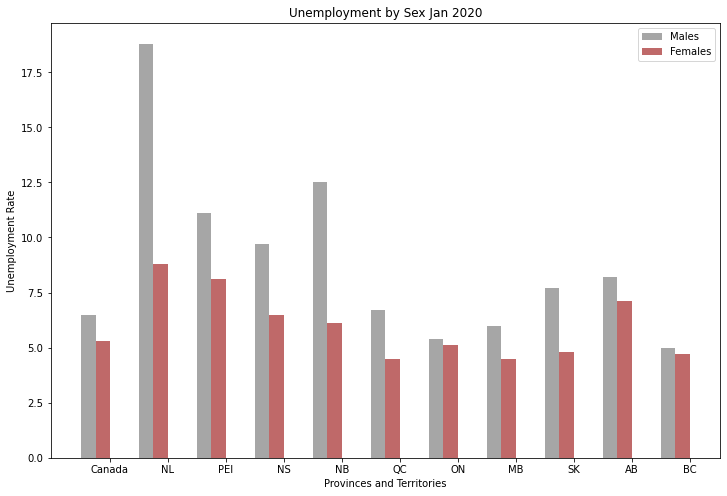

In [109]:
# Setting the positions and width for the bars
positions = list(range(len(jan2020_unemployment_males.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting male bars
plt.bar(positions, jan2020_unemployment_males['VALUE'], 
        width, color = 'gray', alpha = 0.7, label='Males')
# plotting female bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], jan2020_unemployment_females['VALUE'], 
        width, color ='brown', alpha = 0.7, label='Females')

simple_employment_data_age_sex['GEO'].replace({'Newfoundland and Labrador': 'NL', 'Prince Edward Island': 'PEI',
                                           'Nova Scotia': 'NS', 'New Brunswick': 'NB',
                                           'British Columbia': 'BC', 'Saskatchewan': 'SK',
                                           'Manitoba': 'MB', 'Quebec': 'QC',
                                           'Ontario': 'ON', 'Alberta': 'AB'}, inplace = True)

ax.set(title = 'Unemployment by Sex Jan 2020',
       ylabel = 'Unemployment Rate', xlabel = "Provinces and Territories",
       xticks = [p+1.5*width for p in positions], xticklabels = jan2020_unemployment_males.GEO)

plt.legend(['Males','Females'], loc = 'upper right')
plt.show()

In [110]:
jan2020_unemployment_males

,GEO,Sex,VALUE
3833764,Canada,Males,6.5
3834424,NL,Males,18.8
3835084,PEI,Males,11.1
3835744,NS,Males,9.7
3836404,NB,Males,12.5
3837064,QC,Males,6.7
3837724,ON,Males,5.4
3838384,MB,Males,6.0
3839044,SK,Males,7.7
3839704,AB,Males,8.2


In [111]:
may2020_unemployment = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']=='2020-05') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
may2020_unemployment = may2020_unemployment[['GEO', 'Sex', 'VALUE']]
may2020_unemployment_males = may2020_unemployment[may2020_unemployment['Sex']=='Males']
may2020_unemployment_females = may2020_unemployment[may2020_unemployment['Sex']=='Females']

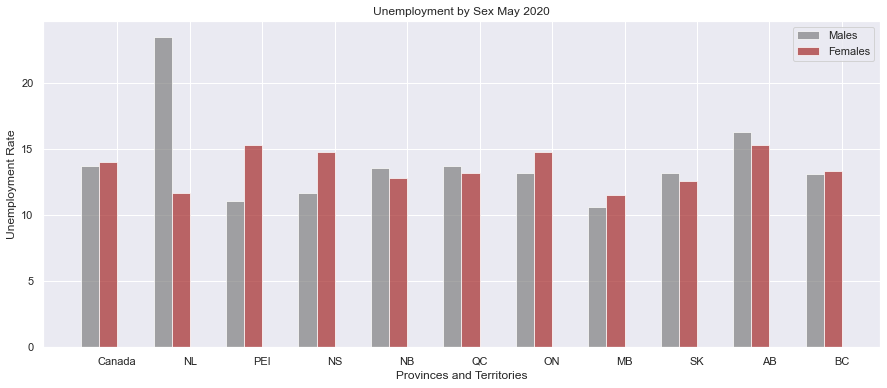

In [183]:
# Setting the positions and width for the bars
positions = list(range(len(may2020_unemployment_males.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(15,8))

# plotting male bars
plt.bar(positions, may2020_unemployment_males['VALUE'], 
        width, color = 'gray', alpha = 0.7, label='Males')
# plotting female bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], may2020_unemployment_females['VALUE'], 
        width, color ='brown', alpha = 0.7, label='Females')


# xindex = ['Canada', 'NL', 'PEI', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC']

may2020_unemployment_males['GEO'].replace({'Newfoundland and Labrador': 'NL', 'Prince Edward Island': 'PEI',
                                           'Nova Scotia': 'NS', 'New Brunswick': 'NB',
                                           'British Columbia': 'BC', 'Saskatchewan': 'SK',
                                           'Manitoba': 'MB', 'Quebec': 'QC',
                                           'Ontario': 'ON', 'Alberta': 'AB'}, inplace = True)

ax.set(title = 'Unemployment by Sex May 2020',
       ylabel = 'Unemployment Rate', xlabel = "Provinces and Territories",
       xticks = [p+1.5*width for p in positions], xticklabels = may2020_unemployment_males.GEO)

plt.legend(['Males','Females'], loc = 'upper right')
plt.show()

In [113]:
august2020_unemployment = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']=='2020-08') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
august2020_unemployment = august2020_unemployment[['GEO', 'Sex', 'VALUE']]
august2020_unemployment_males = august2020_unemployment[august2020_unemployment['Sex']=='Males']
august2020_unemployment_females = august2020_unemployment[august2020_unemployment['Sex']=='Females']

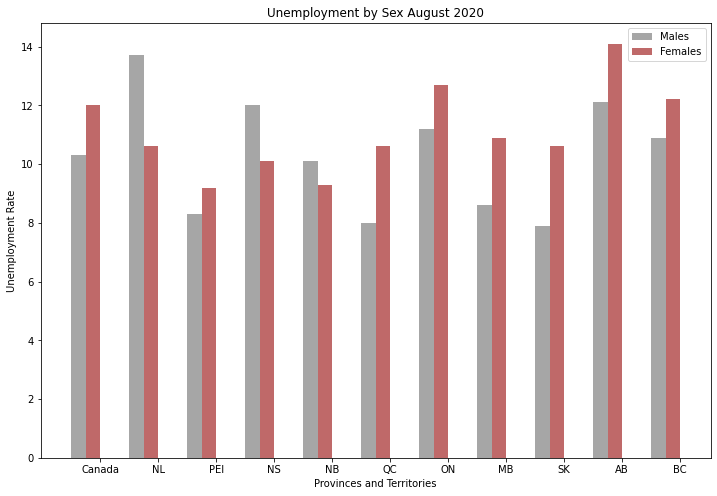

In [114]:
# Setting the positions and width for the bars
positions = list(range(len(august2020_unemployment_males.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting male bars
plt.bar(positions, august2020_unemployment_males['VALUE'], 
        width, color = 'gray', alpha = 0.7, label='Males')
# plotting female bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], august2020_unemployment_females['VALUE'], 
        width, color ='brown', alpha = 0.7, label='Females')

ax.set(title = 'Unemployment by Sex August 2020',
       ylabel = 'Unemployment Rate', xlabel = "Provinces and Territories",
       xticks = [p+1.5*width for p in positions], xticklabels = august2020_unemployment_males.GEO)

plt.legend(['Males','Females'], loc = 'upper right')
plt.show()

In [115]:
november2020_unemployment = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']=='2020-11') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
november2020_unemployment = november2020_unemployment[['GEO', 'Sex', 'VALUE']]
november2020_unemployment_males = november2020_unemployment[november2020_unemployment['Sex']=='Males']
november2020_unemployment_females = november2020_unemployment[november2020_unemployment['Sex']=='Females']

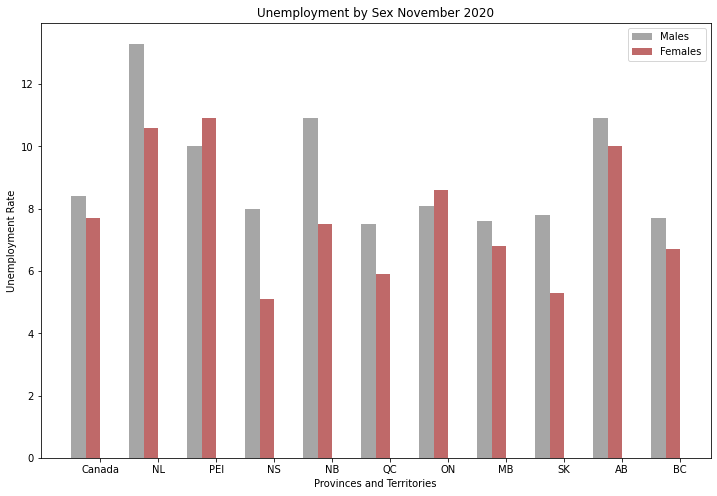

In [116]:
# Setting the positions and width for the bars
positions = list(range(len(november2020_unemployment_males.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting male bars
plt.bar(positions, november2020_unemployment_males['VALUE'], 
        width, color = 'gray', alpha = 0.7, label='Males')
# plotting female bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], november2020_unemployment_females['VALUE'], 
        width, color ='brown', alpha = 0.7, label='Females')

ax.set(title = 'Unemployment by Sex November 2020',
       ylabel = 'Unemployment Rate', xlabel = "Provinces and Territories",
       xticks = [p+1.5*width for p in positions], xticklabels = november2020_unemployment_males.GEO)

plt.legend(['Males','Females'], loc = 'upper right')
plt.show()

In [117]:
jan2021_unemployment = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']=='2021-01') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
jan2021_unemployment = jan2021_unemployment[['GEO', 'Sex', 'VALUE']]
jan2021_unemployment_males = jan2021_unemployment[jan2021_unemployment['Sex']=='Males']
jan2021_unemployment_females = jan2021_unemployment[jan2021_unemployment['Sex']=='Females']

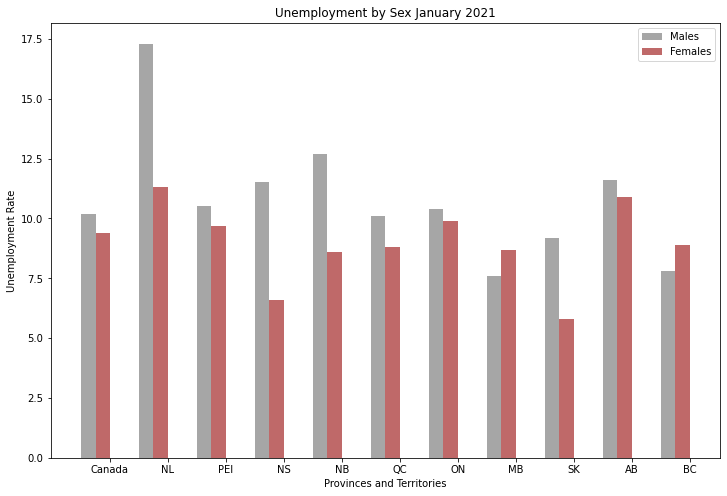

In [118]:
# Setting the positions and width for the bars
positions = list(range(len(jan2021_unemployment_males.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting male bars
plt.bar(positions, jan2021_unemployment_males['VALUE'], 
        width, color = 'gray', alpha = 0.7, label='Males')
# plotting female bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], jan2021_unemployment_females['VALUE'], 
        width, color ='brown', alpha = 0.7, label='Females')

ax.set(title = 'Unemployment by Sex January 2021',
       ylabel = 'Unemployment Rate', xlabel = "Provinces and Territories",
       xticks = [p+1.5*width for p in positions], xticklabels = jan2021_unemployment_males.GEO)

plt.legend(['Males','Females'], loc = 'upper right')
plt.show()

# Timeseries analysis

In [157]:
timeseries_unemployment_canada = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']>= '2020-01') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over') & (simple_employment_data_age_sex['GEO']=='Canada')]
timeseries_unemployment_canada = timeseries_unemployment_canada[['GEO', 'Sex', 'VALUE','REF_DATE']]
timeseries_unemployment_canada_males = timeseries_unemployment_canada[timeseries_unemployment_canada['Sex']=='Males']
timeseries_unemployment_canada_females = timeseries_unemployment_canada[timeseries_unemployment_canada['Sex']=='Females']
timeseries_unemployment_canada

,GEO,Sex,VALUE,REF_DATE
3833764,Canada,Males,6.5,2020-01
3833786,Canada,Females,5.3,2020-01
3841024,Canada,Males,6.6,2020-02
3841046,Canada,Females,5.2,2020-02
3848284,Canada,Males,8.4,2020-03
3848306,Canada,Females,8.6,2020-03
3855544,Canada,Males,14.0,2020-04
3855566,Canada,Females,13.0,2020-04
3862804,Canada,Males,13.7,2020-05
3862826,Canada,Females,14.0,2020-05


In [158]:
import seaborn as sns
# next line of code sets the graph style to a seaborn style
sns.set()
timeseries_unemployment_canada = timeseries_unemployment_canada.pivot("REF_DATE", "Sex", "VALUE")
timeseries_unemployment_canada.head()

Sex,Females,Males
REF_DATE,,
2020-01,5.3,6.5
2020-02,5.2,6.6
2020-03,8.6,8.4
2020-04,13.0,14.0
2020-05,14.0,13.7


<AxesSubplot:xlabel='REF_DATE'>

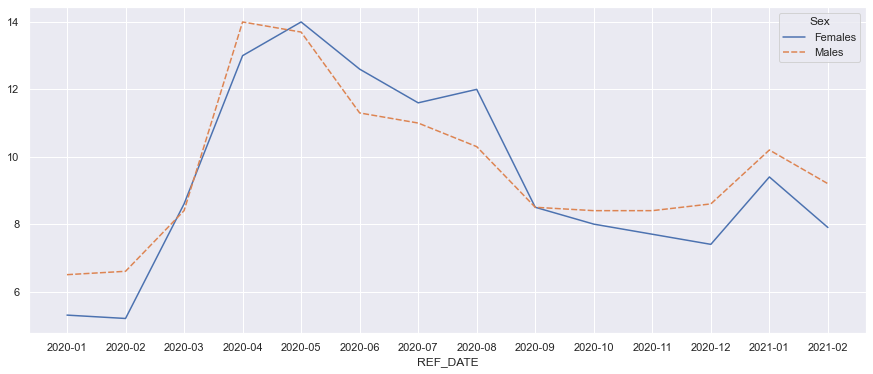

In [163]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=timeseries_unemployment_canada)

In [166]:
timeseries_unemployment_ontario = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']>= '2020-01') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over') & (simple_employment_data_age_sex['GEO']=='ON')]
timeseries_unemployment_ontario = timeseries_unemployment_ontario[['GEO', 'Sex', 'VALUE','REF_DATE']]
timeseries_unemployment_ontario_males = timeseries_unemployment_ontario[timeseries_unemployment_ontario['Sex']=='Males']
timeseries_unemployment_ontario_females = timeseries_unemployment_ontario[timeseries_unemployment_ontario['Sex']=='Females']
timeseries_unemployment_ontario

,GEO,Sex,VALUE,REF_DATE
3837724,ON,Males,5.4,2020-01
3837746,ON,Females,5.1,2020-01
3844984,ON,Males,5.8,2020-02
3845006,ON,Females,5.1,2020-02
3852244,ON,Males,7.7,2020-03
3852266,ON,Females,8.4,2020-03
3859504,ON,Males,11.3,2020-04
3859526,ON,Females,11.4,2020-04
3866764,ON,Males,13.2,2020-05
3866786,ON,Females,14.8,2020-05


<AxesSubplot:xlabel='REF_DATE'>

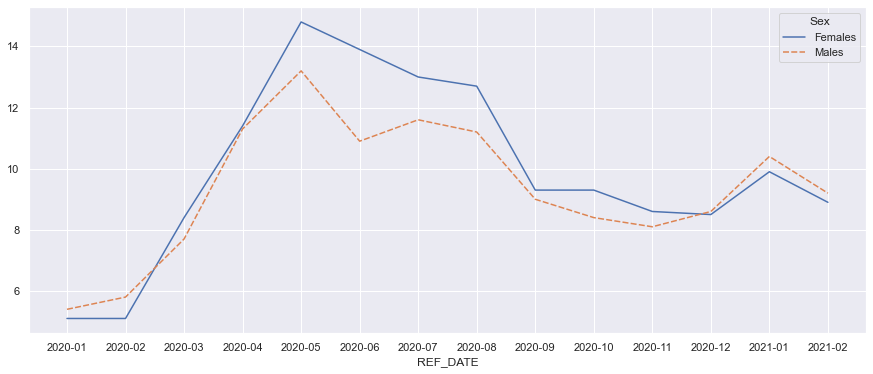

In [167]:
timeseries_unemployment_ontario = timeseries_unemployment_ontario.pivot("REF_DATE", "Sex", "VALUE")
timeseries_unemployment_ontario.head()
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=timeseries_unemployment_ontario)

In [191]:
timeseries_unemployment_alberta = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE']>= '2020-01') & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over') & (simple_employment_data_age_sex['GEO']=='AB')]
timeseries_unemployment_alberta = timeseries_unemployment_alberta[['GEO', 'Sex', 'VALUE','REF_DATE']]
timeseries_unemployment_alberta_males = timeseries_unemployment_alberta[timeseries_unemployment_alberta['Sex']=='Males']
timeseries_unemployment_alberta_females = timeseries_unemployment_alberta[timeseries_unemployment_alberta['Sex']=='Females']
timeseries_unemployment_alberta

,GEO,Sex,VALUE,REF_DATE
3839704,AB,Males,8.2,2020-01
3839726,AB,Females,7.1,2020-01
3846964,AB,Males,8.6,2020-02
3846986,AB,Females,6.6,2020-02
3854224,AB,Males,9.9,2020-03
3854246,AB,Females,9.5,2020-03
3861484,AB,Males,14.0,2020-04
3861506,AB,Females,13.9,2020-04
3868744,AB,Males,16.3,2020-05
3868766,AB,Females,15.3,2020-05


<AxesSubplot:>

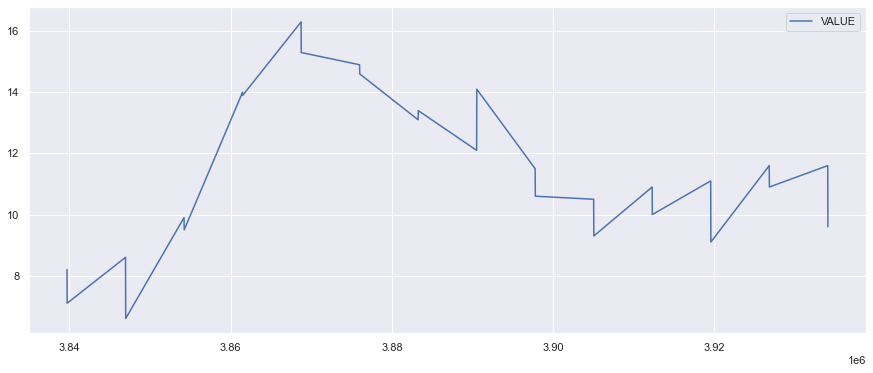

In [192]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=timeseries_unemployment_alberta)

In [176]:
timeseries_unemployment_canada_females = timeseries_unemployment_canada_females[['REF_DATE','VALUE']]
timeseries_unemployment_canada_females.head()

,REF_DATE,VALUE
3833786,2020-01,5.3
3841046,2020-02,5.2
3848306,2020-03,8.6
3855566,2020-04,13.0
3862826,2020-05,14.0


TypeError: can only concatenate str (not "float") to str

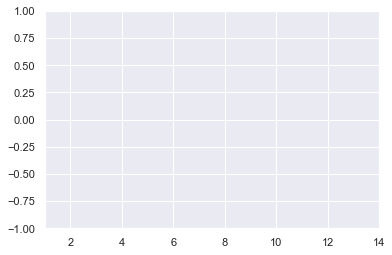

In [177]:
CanadaFemaleTimePlot = pd.plotting.autocorrelation_plot(timeseries_unemployment_canada_females)
CanadaFemaleTimePlot.set_title("An Autocorrelation Graph of female unemployment")
CanadaFemaleTimePlot.set_ylabel("Autocorrelation")
CanadaFemaleTimePlot.set_xlabel("Lags")
None

# Addition - 

### Converting to datetime format - 

In [184]:
employment_data_sex_age = pd.read_csv('./rawcsv_sex_age/14100017.csv', sep=',')

employment_data_sex_age["REF_DATE"] = pd.to_datetime(employment_data_sex_age["REF_DATE"])

employment_data_sex_age["REF_DATE"].unique()

array(['1976-01-01T00:00:00.000000000', '1976-02-01T00:00:00.000000000',
       '1976-03-01T00:00:00.000000000', '1976-04-01T00:00:00.000000000',
       '1976-05-01T00:00:00.000000000', '1976-06-01T00:00:00.000000000',
       '1976-07-01T00:00:00.000000000', '1976-08-01T00:00:00.000000000',
       '1976-09-01T00:00:00.000000000', '1976-10-01T00:00:00.000000000',
       '1976-11-01T00:00:00.000000000', '1976-12-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1977-02-01T00:00:00.000000000',
       '1977-03-01T00:00:00.000000000', '1977-04-01T00:00:00.000000000',
       '1977-05-01T00:00:00.000000000', '1977-06-01T00:00:00.000000000',
       '1977-07-01T00:00:00.000000000', '1977-08-01T00:00:00.000000000',
       '1977-09-01T00:00:00.000000000', '1977-10-01T00:00:00.000000000',
       '1977-11-01T00:00:00.000000000', '1977-12-01T00:00:00.000000000',
       '1978-01-01T00:00:00.000000000', '1978-02-01T00:00:00.000000000',
       '1978-03-01T00:00:00.000000000', '1978-04-01

In [185]:
employment_data_sex_age["REF_DATE"].head(10)

0   1976-01-01
1   1976-01-01
2   1976-01-01
3   1976-01-01
4   1976-01-01
5   1976-01-01
6   1976-01-01
7   1976-01-01
8   1976-01-01
9   1976-01-01
Name: REF_DATE, dtype: datetime64[ns]

In [212]:
befr_covid_table = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE'].between('2019-02', '2020-02')) & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
befr_covid_table = befr_covid_table[['GEO', 'Sex', 'VALUE','REF_DATE']]
befr_covid_table_males = befr_covid_table[befr_covid_table['Sex']=='Males']
befr_covid_table_females = befr_covid_table[befr_covid_table['Sex']=='Females']
befr_covid_table.set_index("REF_DATE")
befr_covid_table.head(10)

,GEO,Sex,VALUE,REF_DATE
3753904,Canada,Males,7.0,2019-02
3753926,Canada,Females,5.3,2019-02
3754564,NL,Males,17.1,2019-02
3754586,NL,Females,9.8,2019-02
3755224,PEI,Males,15.9,2019-02
3755246,PEI,Females,8.8,2019-02
3755884,NS,Males,8.9,2019-02
3755906,NS,Females,6.2,2019-02
3756544,NB,Males,11.9,2019-02
3756566,NB,Females,7.8,2019-02


In [213]:
aftr_covid_table = simple_employment_data_age_sex[(simple_employment_data_age_sex['REF_DATE'].between('2020-03', '2021-02')) & (simple_employment_data_age_sex['Sex'] != 'Both sexes') & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment rate') & (simple_employment_data_age_sex['Age group']=='15 years and over')]
aftr_covid_table = aftr_covid_table[['GEO', 'Sex', 'VALUE','REF_DATE']]
aftr_covid_table_males = aftr_covid_table[aftr_covid_table['Sex']=='Males']
aftr_covid_table_females = aftr_covid_table[aftr_covid_table['Sex']=='Females']
aftr_covid_table.set_index("REF_DATE")
aftr_covid_table

,GEO,Sex,VALUE,REF_DATE
3848284,Canada,Males,8.4,2020-03
3848306,Canada,Females,8.6,2020-03
3848944,NL,Males,18.4,2020-03
3848966,NL,Females,9.0,2020-03
3849604,PEI,Males,12.1,2020-03
...,...,...,...,...
3933446,SK,Females,6.6,2021-02
3934084,AB,Males,11.6,2021-02
3934106,AB,Females,9.6,2021-02
3934744,BC,Males,7.6,2021-02


In [214]:
import seaborn as sns

<AxesSubplot:xlabel='GEO', ylabel='VALUE'>

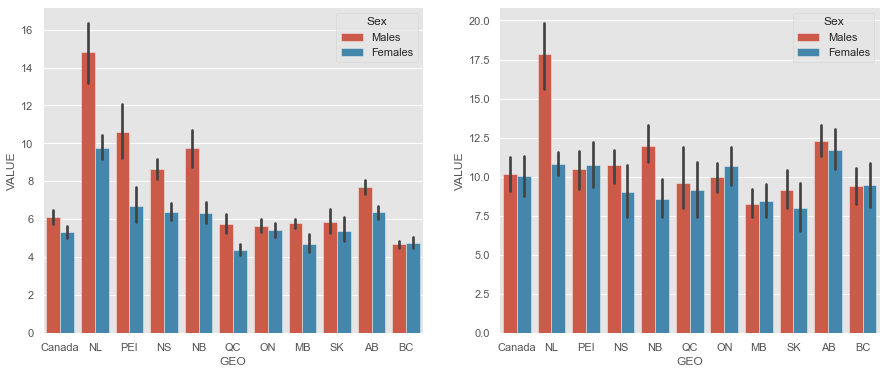

In [224]:
#Sub Plot

plt.style.use('ggplot')

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('GEO', 'VALUE', hue = 'Sex', data = befr_covid_table)

plt.subplot(1,2,2)
sns.barplot('GEO', 'VALUE', hue = 'Sex', data = aftr_covid_table)